In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Perform simple, systematic, stratified, cluster sampling.

Additional requirements:
(a) Ensure that we only have 10% of the records in each case. So, remove extra records, if necessary.
(b) For stratified, use strata as race.
(c) For cluster, use clusters as marital.status.

Then for overall data and for the four samples, find out the average education.num and average fnlwgt. Which of the four sampling methods is the closest to the overall average in the two cases?


In [3]:
df = pd.read_csv("/content/income.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [4]:
avg_org_education_num = df['education.num'].agg(np.mean)
avg_org_fl = df['fnlwgt'].agg(np.mean)
print(avg_org_education_num)
print(avg_org_fl)

10.07632
189661.13492


/tmp/ipython-input-1155250010.py:1: FutureWarning: The provided callable <function mean at 0x7dd45674c220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_org_education_num = df['education.num'].agg(np.mean)
/tmp/ipython-input-1155250010.py:2: FutureWarning: The provided callable <function mean at 0x7dd45674c220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_org_fl = df['fnlwgt'].agg(np.mean)


In [5]:
"""Simple sampling"""

df_new=df.sample(frac=0.1,random_state=42)
df_new

avg_simple_education_num = df_new['education.num'].agg(np.mean)
avg_simple_fl = df_new['fnlwgt'].agg(np.mean)
print(avg_simple_education_num)
print(avg_simple_fl)

10.092
192439.0188


/tmp/ipython-input-2723620814.py:6: FutureWarning: The provided callable <function mean at 0x7dd45674c220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_simple_education_num = df_new['education.num'].agg(np.mean)
/tmp/ipython-input-2723620814.py:7: FutureWarning: The provided callable <function mean at 0x7dd45674c220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_simple_fl = df_new['fnlwgt'].agg(np.mean)


In [6]:
"""Systematic sampling"""

df_sampling=df.iloc[::10,:]
df_sampling

avg_systematic_education_num = df_sampling['education.num'].agg(np.mean)
avg_systematic_fl = df_sampling['fnlwgt'].agg(np.mean)
print(avg_systematic_education_num)
print(avg_systematic_fl)

10.05
188785.6048


/tmp/ipython-input-214582300.py:6: FutureWarning: The provided callable <function mean at 0x7dd45674c220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_systematic_education_num = df_sampling['education.num'].agg(np.mean)
/tmp/ipython-input-214582300.py:7: FutureWarning: The provided callable <function mean at 0x7dd45674c220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_systematic_fl = df_sampling['fnlwgt'].agg(np.mean)


In [7]:
"""Stratified sampling"""

df['race'].value_counts()

race1=len(df[df['race']=='White'])
race2=len(df[df['race']=='Black'])
race3=len(df[df['race']=='Asian-Pac-Islander'])
race4=len(df[df['race']=='Amer-Indian-Eskimo'])
race5=len(df[df['race']=='Other'])
print(race1)
print(race2)
print(race3)
print(race4)
print(race5)

21328
2412
799
252
209


In [8]:
total_whites_sample=int(0.1*race1)
total_black_sample=int(0.1*race2)
total_asian_sample=int(0.1*race3)
total_american_sample=int(0.1*race4)
total_other_sample=int(0.1*race5)
print(total_whites_sample)
print(total_black_sample)
print(total_asian_sample)
print(total_american_sample)
print(total_other_sample)

2132
241
79
25
20


In [9]:
white_sample=df[df['race']=='White'].sample(n=total_whites_sample,random_state=42)
black_sample=df[df['race']=='Black'].sample(n=total_black_sample,random_state=42)
asian_sample=df[df['race']=='Asian-Pac-Islander'].sample(n=total_asian_sample,random_state=42)
american_sample=df[df['race']=='Amer-Indian-Eskimo'].sample(n=total_american_sample,random_state=42)
other_sample=df[df['race']=='Other'].sample(n=total_other_sample,random_state=42)
print(white_sample)
print(black_sample)
print(asian_sample)
print(american_sample)
print(other_sample)

       age         workclass  fnlwgt     education  education.num  \
12948   43           Private  180609     Bachelors             13   
10349   38           Private  165466       HS-grad              9   
12659   26           Private  167350          12th              8   
8823    26           Private  113571       HS-grad              9   
2080    44           Private   67065     Assoc-voc             11   
...    ...               ...     ...           ...            ...   
11795   30           Private   27207          11th              7   
22173   80  Self-emp-not-inc  562336       HS-grad              9   
8066    44           Private  191814  Some-college             10   
24662   34         Local-gov  143766  Some-college             10   
17357   64           Private  171373          11th              7   

           marital.status         occupation   relationship   race     sex  \
12948  Married-civ-spouse   Transport-moving        Husband  White    Male   
10349  Married-

In [10]:
df_sample_race=pd.concat([white_sample,black_sample,asian_sample,american_sample,other_sample])
df_sample_race


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
12948,43,Private,180609,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States,<=50K
10349,38,Private,165466,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,60,United-States,>50K
12659,26,Private,167350,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
8823,26,Private,113571,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,70,United-States,<=50K
2080,44,Private,67065,Assoc-voc,11,Never-married,Priv-house-serv,Not-in-family,White,Male,594,0,25,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,39,Private,112731,HS-grad,9,Divorced,Other-service,Not-in-family,Other,Female,0,0,40,Dominican-Republic,<=50K
20250,21,Private,177420,Some-college,10,Never-married,Adm-clerical,Not-in-family,Other,Female,0,0,40,United-States,<=50K
2617,53,?,220640,Bachelors,13,Divorced,?,Other-relative,Other,Female,0,0,20,United-States,<=50K
20428,28,Private,138054,Assoc-acdm,12,Never-married,Other-service,Not-in-family,Other,Male,0,0,40,United-States,<=50K


In [11]:
avg_stratified_education_num = df_sample_race['education.num'].agg(np.mean)
avg_stratified_fl = df_sample_race['fnlwgt'].agg(np.mean)
print(avg_stratified_education_num)
print(avg_stratified_fl)


10.089707649179015
187902.4929915899


/tmp/ipython-input-2490473221.py:1: FutureWarning: The provided callable <function mean at 0x7dd45674c220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_stratified_education_num = df_sample_race['education.num'].agg(np.mean)
/tmp/ipython-input-2490473221.py:2: FutureWarning: The provided callable <function mean at 0x7dd45674c220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_stratified_fl = df_sample_race['fnlwgt'].agg(np.mean)


In [12]:
"""Cluster Sampling"""

unique_marital_status = df['marital.status'].unique()
len_marital = len(unique_marital_status)
len_marital
df['marital.status'].value_counts()

,count
marital.status,
Married-civ-spouse,11518
Never-married,8204
Divorced,3390
Separated,792
Widowed,766
Married-spouse-absent,312
Married-AF-spouse,18


In [15]:
np.random.seed(42)
df_sample_martial = np.random.choice(unique_marital_status, size=len_marital //2, replace=False)
df_sample_martial

array(['Married-civ-spouse', 'Divorced', 'Married-spouse-absent'],
      dtype=object)

In [17]:
df_martial_MarriedCIV = df[df['marital.status']=="Married-civ-spouse"].sample(frac=0.095,random_state=42)
df_martial_Divorced = df[df['marital.status']=="Divorced"].sample(frac=0.32,random_state=42)
df_martial_Married_Spouse_Absent = df[df['marital.status']=="Married-spouse-absent"].sample(frac=1,random_state=42)

len(df_martial_Divorced),len(df_martial_MarriedCIV),len(df_martial_Married_Spouse_Absent)

(1085, 1094, 312)

In [18]:
df_sample_marital = pd.concat([df_martial_Divorced,df_martial_MarriedCIV,df_martial_Married_Spouse_Absent])
df_sample_marital


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
923,58,Private,203735,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
13241,46,Local-gov,140219,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,8614,0,55,United-States,>50K
18430,27,Private,151382,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Male,0,974,40,United-States,<=50K
14812,43,Private,355728,HS-grad,9,Divorced,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
9811,57,Private,169071,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,0,28,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,43,Self-emp-not-inc,35236,HS-grad,9,Married-spouse-absent,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
6517,24,Private,132327,Some-college,10,Married-spouse-absent,Sales,Unmarried,Other,Female,0,0,30,Ecuador,<=50K
9844,49,Private,141944,Assoc-voc,11,Married-spouse-absent,Handlers-cleaners,Unmarried,White,Male,0,1380,42,United-States,<=50K
22014,51,Local-gov,193720,HS-grad,9,Married-spouse-absent,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K


In [19]:
avg_cluster_education_num = df_sample_marital['education.num'].agg(np.mean)
avg_cluster_fl = df_sample_marital['fnlwgt'].agg(np.mean)
print(avg_cluster_education_num)
print(avg_cluster_fl)

10.04897631473304
185349.58450421516


/tmp/ipython-input-387152446.py:1: FutureWarning: The provided callable <function mean at 0x7dd45674c220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_cluster_education_num = df_sample_marital['education.num'].agg(np.mean)
/tmp/ipython-input-387152446.py:2: FutureWarning: The provided callable <function mean at 0x7dd45674c220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_cluster_fl = df_sample_marital['fnlwgt'].agg(np.mean)


In [20]:
print('sampling avg comparison')
print("Original",avg_org_education_num)
print("fnlwgt",avg_org_fl)
print("Cluster: ",avg_cluster_education_num)
print("fnlwgt cluster",avg_cluster_fl)
print("Simple",avg_simple_education_num)
print("fnlwgt simple",avg_simple_fl)
print("Systematic: ",avg_systematic_education_num)
print("fnlwgt systematic",avg_systematic_fl)
print("Stratified",avg_stratified_education_num)
print("fnlwgt stratified",avg_stratified_fl)



sampling avg comparison
Original 10.07632
fnlwgt 189661.13492
Cluster:  10.04897631473304
fnlwgt cluster 185349.58450421516
Simple 10.092
fnlwgt simple 192439.0188
Systematic:  10.05
fnlwgt systematic 188785.6048
Stratified 10.089707649179015
fnlwgt stratified 187902.4929915899


Assignment 2 (Probability Theory)

1. Go through the titanic dataset and either use Python or Excel to find the following:
a. Probability that a passenger dies (Marginal probability)
b. Probability that a passenger was male and survived (Joint probability of independent events)
c. Probability that a passenger survived given that she was a female (Conditional/Joint probability of dependent events)


In [21]:
df = pd.read_csv('/content/titanic.csv')
d = len(df)
d

891

In [22]:
x = len(df['survived'])
y = len(df[df['survived']==0])
print('Probabillity that the passenger dies: ')
prob= round((y*100/x),2)
print(prob,"%")

Probabillity that the passenger dies: 
61.62 %


In [23]:
xx = len(df[(df['survived']==1) & (df['gender']=='male')])

print('Probabillity that a passenger survived given that was male: ')
prob= round((xx*100/d),2)
print(prob,"%")

Probabillity that a passenger survived given that was male: 
12.23 %


In [24]:

xy = len(df[(df['survived']==1) & (df['gender']=='female')])
fx = len(df[df['gender'] == 'female'])
print('Probabillity that a passenger survived given that she was female: ')
prob= round((xy*100/fx),2)
print(prob,"%")

Probabillity that a passenger survived given that she was female: 
74.2 %


2. For the nobel dataset, find:
(a) Probability of winning a Nobel Prize in Physics given the laureate is female
(b) Probability of winning a Nobel Prize in Literature given the laureate was born in the USA


In [25]:
df=pd.read_csv('/content/nobel.csv')
df

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,01-Mar,10000000,12295082,10/10/2001,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,01-Mar,630000,3404179,17/10/1975,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,01-Mar,10000000,11762861,06/10/2004,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,18/10/1982,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,01-Mar,800000,2988048,15/10/1979,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1972,Physics,The Nobel Prize in Physics,1,01-Mar,480000,3345725,NaN,received,for their jointly developed theory of supercon...,...,NaN,NaN,NaN,Individual,NaN,NaN,"University of Illinois, Urbana, IL, USA",NaN,NaN,NaN
946,1954,Chemistry,The Nobel Prize in Chemistry,1,1,181647,2640218,NaN,received,for his research into the nature of the chemic...,...,NaN,NaN,NaN,Individual,NaN,NaN,"California Institute of Technology (Caltech), ...",NaN,NaN,NaN
947,1911,Chemistry,The Nobel Prize in Chemistry,1,1,140695,7327865,NaN,received,in recognition of her services to the advancem...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Sorbonne University, Paris, France",NaN,NaN,NaN
948,1981,Peace,The Nobel Peace Prize,1,1,1000000,2929688,14/10/1981,received,for promoting the fundamental rights of refugees,...,Switzerland,Switzerland,"Geneva, Switzerland",Organization,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
N=len(df)

A_and_B=len(df[(df['category']=='Physics') & (df['gender']=='female')])
B=len(df[df['category']=='Physics'])
A=len(df[df['gender']=='female'])
print(A_and_B)
print(B)
print(A)

3
213
54


In [27]:
P_A = A / N
P_B = B / N
P_given_A_and_B = A_and_B / A
print(P_A)
print(P_B)
print(P_given_A_and_B)


0.056842105263157895
0.22421052631578947
0.05555555555555555


In [28]:
C = len(df[df['birth_country']=='USA'])
A_and_C = len(df[(df['category']=='Literature') & (df['birth_country']=='USA')])
print(C)
print(A_and_C)

274
9


In [29]:
P_C = C / N
P_given_A_and_C = A_and_C / C
print(P_A)
print(P_C)
print(P_given_A_and_C)


0.056842105263157895
0.28842105263157897
0.032846715328467155


3. Combine datasets:
Men ODI Team Match Results - 20th Century.csv
Men ODI Team Match Results - 21st Century.csv

Find the historical win rate of India.
Now India is scheduled to play 60 ODI matches over the next 3 years.

(a) What is the probability that India wins exactly 35 out of these 60 matches?
(b) What is the probability that India wins more than 40 matches?
(c) What is the probability that India wins at least 45 matches?
(d) What is the most likely number of wins India will have in 60 matches?


In [30]:
from scipy.stats import binom

In [32]:
df1 = pd.read_csv('/content/Men ODI Team Match Results - 21st Century.csv')
df2 = pd.read_csv('/content/Men ODI Team Match Results - 20th Century.csv')
df = pd.concat([df1, df2])
n = len(df)
df

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country
0,Lost,5 wickets,Sri Lanka v England,Away,Dambulla,2001/03/23,Mar,2001,Mar 2001,1,England
1,Lost,66 runs,Sri Lanka v England,Away,Colombo (RPS),2001/03/25,Mar,2001,Mar 2001,1,England
2,Lost,10 wickets,Sri Lanka v England,Away,Colombo (SSC),2001/03/27,Mar,2001,Mar 2001,1,England
3,Lost,108 runs,England v Pakistan,Home,Birmingham,2001/06/07,Jun,2001,Jun 2001,1,England
4,Lost,5 wickets,England v Australia,Home,Bristol,2001/06/10,Jun,2001,Jun 2001,1,England
...,...,...,...,...,...,...,...,...,...,...,...
3366,Lost,6 wickets,Australia v Scotland,Away,Worcester,1999/05/16,May,1999,May 1999,1,Scotland
3367,Lost,94 runs,Pakistan v Scotland,Away,Chester-le-Street,1999/05/20,May,1999,May 1999,1,Scotland
3368,Lost,22 runs,Scotland v Bangladesh,Home,Edinburgh,1999/05/24,May,1999,May 1999,1,Scotland
3369,Lost,8 wickets,Scotland v West Indies,Home,Leicester,1999/05/27,May,1999,May 1999,1,Scotland


In [33]:
wins = len(df[df['Result'] == 'Won'])
winrate = wins / n
print(winrate)

0.46821215314366


In [34]:
#a

pmf1 = binom.pmf(35, 60, winrate)
print(pmf1)

0.021098452477494856


In [35]:
# b

pmf2 = 1 - binom.cdf(40, 60, winrate)
print(pmf2)

0.0006258300041942499


In [36]:
# c
pmf3 = binom.cdf(44, 60, winrate)   # 1 - binom(15,60 ,1 -winrate)
print(pmf3)

0.9999916179577542


In [37]:
#d
pdf4 = binom.pmf(range(60), 60, winrate)
print(pdf4)

[3.50190597e-17 1.84995006e-15 4.80492149e-14 8.17894540e-13
 1.02616323e-11 1.01190268e-10 8.16684772e-10 5.54695256e-09
 3.23552387e-08 1.64592377e-07 7.39067607e-07 2.95777927e-06
 1.06337114e-05 3.45690169e-05 1.02178877e-04 2.75887467e-04
 6.83169985e-04 1.55681428e-03 3.27443996e-03 6.37289840e-03
 1.15025765e-02 1.92903497e-02 3.01083046e-02 4.37971990e-02
 5.94485263e-02 7.53716217e-02 8.93319533e-02 9.90435634e-02
 1.02774753e-01 9.98487643e-02 9.08421508e-02 7.74018326e-02
 6.17594667e-02 4.61372710e-02 3.22582664e-02 2.10984525e-02
 1.29000794e-02 7.36726304e-03 3.92603973e-03 1.94992110e-03
 9.01323336e-04 3.87107003e-04 1.54184108e-04 5.68261112e-05
 1.93307390e-05 6.05146045e-06 1.73739233e-06 4.55651027e-07
 1.08652254e-07 2.34276206e-08 4.53790226e-09 7.83410225e-10
 1.19380303e-10 1.58654015e-11 1.81075470e-12 1.73921173e-13
 1.36722096e-14 8.44749841e-16 3.84703072e-17 1.14817454e-18]


In [38]:
pdf4 = (winrate *100) * 60/8541
print(pdf4)

0.32891615956702497


4. Calculate Z-scores and do outlier analysis on (a) Glucose column of Diabetes dataset, (b) Billionaiers dataset.


In [48]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [73]:
from scipy.stats import zscore

In [74]:
glucose_mean = df['Glucose'].mean()
glucose_std = df['Glucose'].std()
print(glucose_mean)
print(glucose_std)

120.89453125
31.97261819513622


In [75]:

df['Glucosezscore'] = zscore(df['Glucose'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucosezscore
0,6,148,72,35,0,33.6,0.627,50,1,0.848324
1,1,85,66,29,0,26.6,0.351,31,0,-1.123396
2,8,183,64,0,0,23.3,0.672,32,1,1.943724
3,1,89,66,23,94,28.1,0.167,21,0,-0.998208
4,0,137,40,35,168,43.1,2.288,33,1,0.504055
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,-0.622642
764,2,122,70,27,0,36.8,0.340,27,0,0.034598
765,5,121,72,23,112,26.2,0.245,30,0,0.003301
766,1,126,60,0,0,30.1,0.349,47,1,0.159787


In [76]:
zscorethreshold = 3

In [77]:

all_outliers = df[df['Glucosezscore'].abs()  > zscorethreshold]
print(all_outliers)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  Glucosezscore  
75                      0.140   22        0      -3.783654  
182                     0.299   21        0      -3.783654  
342                     0.389   22        0      -3.783654  
349                     0.346   37        1      -3.783654  
502                     0.727   41        1      -3.783654  


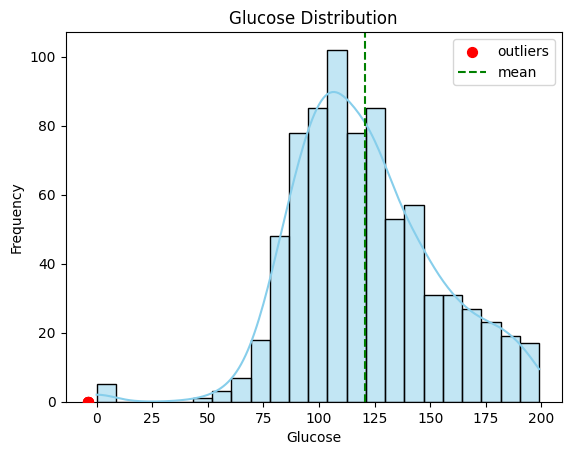

In [78]:
sns.histplot(df['Glucose'], color='skyblue', kde=True)
plt.scatter(all_outliers['Glucosezscore'],[0]*len(all_outliers),color='red',s=50,zorder = 5,label='outliers')
plt.axvline(glucose_mean,color='green',linestyle='--',label='mean')
plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend()
plt.show()

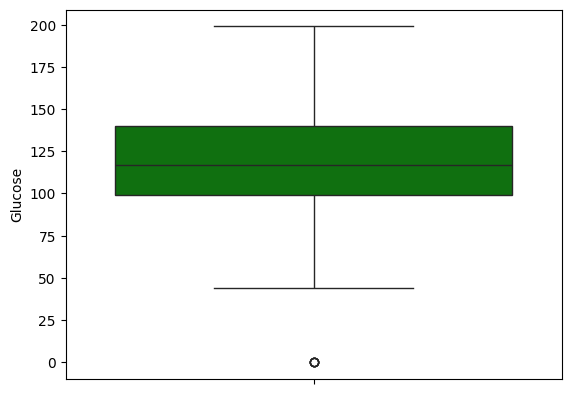

In [79]:
sns.boxplot(y=df['Glucose'],color='green')
plt.show()

5. For billionaires dataset and titanic age column, first run shapiro test and qq-plot. Then try CLT on both and see if now we see normal distribution for their sample means.


In [39]:
df = pd.read_csv('/content/billionaires.csv')
df


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [40]:
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
age=df['age'].dropna()

shapiro_test = stats.shapiro(age)
print(shapiro_test.statistic)
print(shapiro_test.pvalue)
age

0.9966704742971583
1.940826099666913e-05


,age
0,74.0
1,51.0
2,59.0
3,78.0
4,92.0
...,...
2635,51.0
2636,80.0
2637,60.0
2638,71.0


In [43]:
if shapiro_test.pvalue > 0.05:
  print("normal distribution")
else:
  print("not normal distribution")

not normal distribution


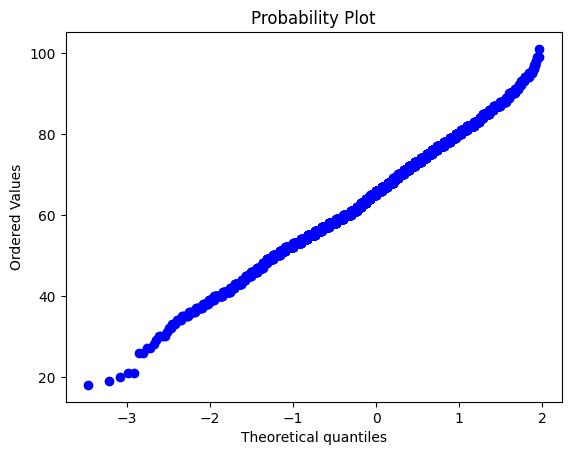

In [44]:
stats.probplot(df['age'], dist="norm", plot=plt)
plt.show()

In [45]:
#central limit theorm

sample_means = []
n_samples = 250
sample_size = 30

for i in range(n_samples):
  sample = df['age'].sample(sample_size, replace=True)
  sample_mean = sample.mean()
  sample_means.append(sample_mean)


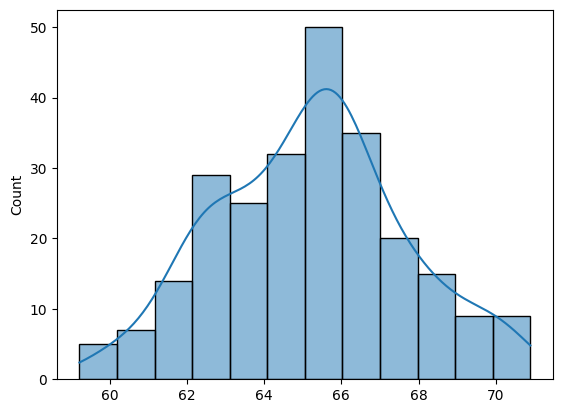

In [46]:
sns.histplot(sample_means, kde=True)
plt.show()

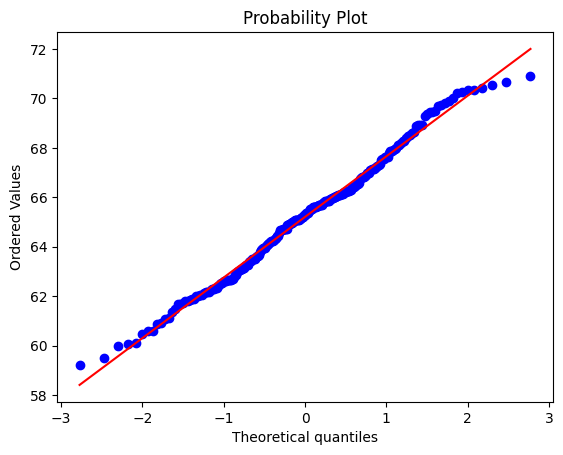

In [47]:
stats.probplot(sample_means, dist="norm", plot=plt)
plt.show()


6. It is estimated that the average marks obtained by students in some entrance exam are 76 out of 100. To evaluate this claim, we take a sample of 100 students and find that the average marks are 78 with a standard deviation of 2.
(a) State your null and alternate hypothesis.
(b) Decide alpha value.
(c) Calculate test statistic.
(d) Compare the test statistic with critical value.
(e) Compare your p-value (Use z-table or z-calculator) with alpha.
(f) State your conclusion.


a) state your null and alternate hypothesis


H0 = meu is 76
H1 = mue not 76

b) decide alpha value

In [50]:
alpha =0.05

c) calculate test statistic

In [51]:
zscore = (78 - 76) / (2 / np.sqrt(100))
zscore

np.float64(10.0)

d) compare test statistic with critical value

In [52]:
critical_value = 1.96

e) compare your p value (use z table or cal) with alpha

pvalue is almost zero for zscore 10.

zscore > critical_value

f) state your conclusion

In [53]:
if zscore > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


7.(a) A pharma company has manufactured a new medicine and claims that the average effectiveness of the medicine can be seen in 8 weeks. We study this for 25 patients and find that this effectiveness is seen in 8.5 weeks with a standard deviation of 0.25 weeks. Do the same steps as above and draw conclusions, for alpha = 0.01, 0.05, and 0.1 separately.

H0 : effectiveness seen in 8 weeks //
H1 : Effectiveness not seen in 8 weeks

In [54]:
zscore = (8.5-8) / (0.25/np.sqrt(25))
zscore

np.float64(10.0)

In [55]:
critical_values = [2.57,1.96,1.64]

In [56]:
alpha = [0.01, 0.05, 0.1]

for zscore 10 pvalue is almost zero

In [57]:
current_zscore = abs(zscore) # Use the absolute value for comparison in a two-tailed test

for idx, critical_val in enumerate(critical_values):
  current_alpha = alpha[idx]
  if current_zscore > critical_val:
      print(f"Reject the null hypothesis for alpha: {current_alpha}")
  else:
      print(f"Fail to reject the null hypothesis for alpha: {current_alpha}")

Reject the null hypothesis for alpha: 0.01
Reject the null hypothesis for alpha: 0.05
Reject the null hypothesis for alpha: 0.1


(b) For the same case above, another study shows average effectiveness in 7.5 weeks for a different set of 25 patients with a standard deviation of 0.25 weeks. What will be our conclusion?


In [58]:
zscore = (7.5-8) / (0.25/np.sqrt(25))
zscore

np.float64(-10.0)

In [59]:
alpha = [0.01, 0.05, 0.1]

In [60]:
critical_values = [2.57,1.96,1.64]

In [61]:
current_zscore = abs(zscore) # Use the absolute value for comparison in a two-tailed test

for idx, critical_val in enumerate(critical_values):
  current_alpha = alpha[idx]
  if current_zscore > critical_val:
      print(f"Reject the null hypothesis for alpha: {current_alpha}")
  else:
      print(f"Fail to reject the null hypothesis for alpha: {current_alpha}")

Reject the null hypothesis for alpha: 0.01
Reject the null hypothesis for alpha: 0.05
Reject the null hypothesis for alpha: 0.1


8. A courier company delivers parcels in a particular area in 30 minutes. A new GPS system installed has reduced the average time to 28 minutes, when 100 trucks were studied, with a sample standard deviation of 4.2 minutes. Run a two-tailed test and a one-tailed (left-tailed) test.


In [63]:
import math

In [64]:
from scipy.stats import norm

In [65]:
mu = 30
sample = [28]
s=4.2
n=100
alpha = 0.05
z_crit_one_tailed = norm.ppf(1-alpha)
z_crit_two_tailed = norm.ppf(1-(alpha/2))
print(f"Critical Values")
print(f"two tail (alpha=0.05):+-{z_crit_two_tailed:3f}")
print(f"One tail (alpha=0.05):+-{z_crit_one_tailed:3f}")

Critical Values
two tail (alpha=0.05):+-1.959964
One tail (alpha=0.05):+-1.644854


In [66]:
def compute_z(xbar):
  return (xbar - mu)/(s/math.sqrt(n))

In [67]:
for xbar in sample:
  print(f"For sample mean xbar = {xbar}")
  z = compute_z(xbar)
  # p-values
  p_two_tailed = 2 * (norm.cdf(abs(z)))
  p_one_tailed = norm.cdf(abs(z))
  print(f"Zscore : {z:3f}")
  # two tailed descison
  if abs(z) > z_crit_two_tailed:
    two_tail_decison = "Reject the null hypothesis"
  else:
    two_tail_decison = "Fail to reject the null hypothesis"
  # one tailed descison
  if abs(z) > z_crit_one_tailed:
    one_tail_decison = "Reject the null hypothesis"
  else:
    one_tail_decison = "Fail to reject the null hypothesis"
  print("Two tailed test")
  print(f"P-value: {p_two_tailed:3f}")
  print(f"Decision: {two_tail_decison}")
  print("One tailed test")
  print(f"P-value: {p_one_tailed:2f}")
  print(f"Decision: {one_tail_decison}")

For sample mean xbar = 28
Zscore : -4.761905
Two tailed test
P-value: 1.999998
Decision: Reject the null hypothesis
One tailed test
P-value: 0.999999
Decision: Reject the null hypothesis


9. A battery manufacturer claims that a battery which used run for 30 hours now runs for more than 30 hours due to new technology. 200 batteries were studied. Average battery time was found to be 29.5 hours with a standard deviation of 8 hours. Run a one-tailed (right-tailed) test.


In [68]:
mu=30
n=200
s=8
samplemean=[29.5]
alpha=0.05
z_crit_one_tailed=norm.ppf(1-alpha)
print(f"one tail  (alpha = 0.05):{z_crit_one_tailed}")

one tail  (alpha = 0.05):1.6448536269514722


In [69]:
def compute_z(xbar):
  return (xbar - mu)/(s/math.sqrt(n))

In [70]:
for xbar in samplemean:
  print(f"For sample mean xbar = {xbar}")
  z = compute_z(xbar)
  # p-values
  p_one_tailed = 1 - norm.cdf(abs(z))
  print(f"Zscore : {z:3f}")
  # one tailed descison
  if abs(z) > z_crit_one_tailed:
    one_tail_decison = "Reject the null hypothesis"
  else:
    one_tail_decison = "Fail to reject the null hypothesis"
    print("One tailed test")
  print(f"P-value: {p_one_tailed:2f}")
  print(f"Decision: {one_tail_decison}")

For sample mean xbar = 29.5
Zscore : -0.883883
One tailed test
P-value: 0.188380
Decision: Fail to reject the null hypothesis


10. For the three combined Marathon datasets, extract the top 25 records with lowest finish time (Official Time column). Check the null hypothesis H0 = The average finishing time of the top 25 athletes is 130 minutes. Test it for α = 1%, 5%, and 10%.




In [80]:
df1=pd.read_csv('/content/marathon_results_2016.csv')
df2=pd.read_csv('/content/marathon_results_2017.csv')
df3=pd.read_csv('/content/marathon_results_2015.csv')

In [81]:
df_all=pd.concat([df1,df2,df3])
df_all

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Unnamed: 0,Unnamed: 9
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1,NaN,NaN
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2,NaN,NaN
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3,NaN,NaN
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4,NaN,NaN
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,NaN,0:50:15,...,6:17:19,7:13:34,0:17:31,-,7:38:56,26594,12015,269,26593.0,MI
26594,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,...,6:28:56,7:26:19,0:17:59,-,7:51:30,26595,12016,270,26594.0,NaN
26595,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,...,6:38:51,7:36:18,0:18:18,-,7:59:33,26596,12017,91,26595.0,NaN
26596,29396,"Buccilli, Alfred P.",53,M,Lynnfield,MA,USA,NaN,NaN,0:49:04,...,6:33:35,7:35:38,0:18:20,-,8:00:37,26597,14580,2055,26596.0,NaN


In [113]:
lowest_finish_time=df_all['Overall'].nsmallest(25)
lowest_finish_time

,Overall
0,1
0,1
0,1
1,2
1,2
1,2
2,3
2,3
2,3
3,4


11. For combined Marathon datasets, find if younger (age <= 30) and older (age > 30) athletes have a similar average pace.


In [82]:
dfall=pd.concat([df1,df2,df3])

In [83]:
ageless= dfall[dfall['Age']<=30]
agemore= dfall[dfall['Age']>30]
print(ageless)
print(agemore)

         Bib                 Name  Age M/F         City State Country Citizen  \
0          5  Hayle, Lemi Berhanu   21   M  Addis Ababa   NaN     ETH     NaN   
1          1       Desisa, Lelisa   26   M         Ambo   NaN     ETH     NaN   
4         14     Lonyangata, Paul   23   M      Eldoret   NaN     KEN     NaN   
5          3       Kitwara, Sammy   29   M      Eldoret   NaN     KEN     NaN   
7         17        Nageeye, Abdi   27   M     Nijmegen   NaN     NED     NaN   
...      ...                  ...  ...  ..          ...   ...     ...     ...   
26549  29879        Hannon, Sarah   29   F       Quincy    MA     USA     NaN   
26558  27458        Thomas, Jenna   26   F       Woburn    MA     USA     NaN   
26567  26907   Lynch, Kathleen C.   26   F      Waltham    MA     USA     NaN   
26572  29406  Dzerkacz, Charlotte   30   F      Maynard    MA     USA     NaN   
26579  12397  Simmons, William C.   27   M    Cambridge    MA     USA     NaN   

      Unnamed: 8       5K  

In [84]:
ageless = ageless.sample(n=30,replace =False)
agemore = agemore.sample(n=30,replace =False)
ageless['Pace'] = pd.to_timedelta(ageless['Pace']).dt.total_seconds()
agemore['Pace'] = pd.to_timedelta(agemore['Pace']).dt.total_seconds()
ageless['Pace']

,Pace
690,394.0
9237,475.0
5718,470.0
5426,463.0
4723,436.0
1977,406.0
15274,547.0
226,376.0
515,391.0
11084,488.0


In [85]:
t_statistic, p_value = stats.ttest_ind(ageless['Pace'], agemore['Pace'])


In [86]:
alpha = 0.05
print('P-value:', p_value)
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P-value: 0.03898759402768058
Reject the null hypothesis


12. For StudentsPerformance.csv, using ANOVA find if there is a significant difference in Maths marks depending on the level of parental education.


In [91]:
from scipy.stats import f_oneway
from scipy import stats

In [87]:
df=pd.read_csv('/content/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [88]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [89]:
s1=df['math score'][df['parental level of education']=="some college"]
s2=df['math score'][df['parental level of education']=="associate's degree"]
s3=df['math score'][df['parental level of education']=="high school"]
s4=df['math score'][df['parental level of education']=="some high school"]
s5=df['math score'][df['parental level of education']=="bachelor's degree"]
s6=df['math score'][df['parental level of education']=="master's degree"]

In [92]:
tstat,pval=f_oneway(s1,s2,s3,s4,s5,s6)
print("Pvalue:",pval)

Pvalue: 5.592272384107223e-06


In [93]:
alpha = 0.05

In [94]:
if pval < alpha:
  print("Reject null hypothesis")
else:
  print("Accept null hypothesis")

Reject null hypothesis


13. Try to find if gender and smoking are related in the tips dataset.


In [96]:
from scipy.stats import chi2_contingency

In [98]:
df = pd.read_csv('/content/tips.csv')
df

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5.296070e+15,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3.506810e+15,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6.011890e+15,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4.375220e+12,Sat17


In [99]:
contingency_table = pd.crosstab(df['gender'], df['smoker'])
contingency_table

smoker,No,Yes
gender,,
Female,54,33
Male,97,60


In [100]:
chi2_stat, p_value, dof, expecrted = chi2_contingency(contingency_table)
print("Pvalue:",p_value)
print("chi square statistic: ", chi2_stat)
print("degree of freedom: ",dof)

Pvalue: 1.0
chi square statistic:  0.0
degree of freedom:  1


In [101]:
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis



14. Consider diabetes dataset and find the relation of age with diabetes outcome.
(Hint: Group age into 3 categories: Young ≤ 30, Middle 31–50, Old > 50)


In [102]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [103]:
df['young'] = df['Age'] <= 30
df['old'] = df['Age'] > 50
df['middle'] = (df['Age'] > 30) & (df['Age'] <= 50)

In [104]:
contingency_table_young = pd.crosstab(df['young'], df['Outcome'])
contingency_table

smoker,No,Yes
gender,,
Female,54,33
Male,97,60


In [105]:
contingency_table_middle = pd.crosstab(df['middle'], df['Outcome'])
contingency_table_middle

Outcome,0,1
middle,,
False,370,128
True,130,140


In [106]:
contingency_table_old = pd.crosstab(df['old'], df['Outcome'])
contingency_table_old

Outcome,0,1
old,,
False,457,230
True,43,38


In [107]:
chi2_stat_young, p_value_young, dof_young, expecrted_young = chi2_contingency(contingency_table_young)
print("Pvalue:",p_value_young)
print("chi square statistic: ", chi2_stat_young)
print("degree of freedom: ",dof_young)

Pvalue: 6.223278112638916e-17
chi square statistic:  69.90492795568369
degree of freedom:  1


In [108]:
if p_value_young < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


In [109]:
chi2_stat_middle, p_value_middle, dof_middle, expecrted_middle = chi2_contingency(contingency_table_middle)
print("Pvalue:",p_value_middle)
print("chi square statistic: ", chi2_stat_middle)
print("degree of freedom: ",dof_middle)


Pvalue: 6.982243784104944e-13
chi square statistic:  51.54927588563208
degree of freedom:  1


In [110]:
if p_value_middle < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


In [111]:
chi2_stat_old, p_value_old, dof_old, expecrted_old = chi2_contingency(contingency_table_old)
print("Pvalue:",p_value_old)
print("chi square statistic: ", chi2_stat_old)
print("degree of freedom: ",dof_old)

Pvalue: 0.022844817057049424
chi square statistic:  5.180266701427361
degree of freedom:  1


In [112]:
if p_value_old < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis
